In [20]:
%matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
bluegills=pd.read_csv(r"C:\Users\Double2\Desktop\dataanalysis\bluegills.txt",sep="\t")
plt.scatter(bluegills['age'],bluegills['length'])

Using matplotlib backend: Qt5Agg


In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

bluegills=pd.read_csv(r"C:\Users\Double2\Desktop\dataanalysis\bluegills.txt",sep="\t")
feature_2=PolynomialFeatures(degree=2)
age_2=feature_2.fit_transform(bluegills["age"].values.reshape(-1,1))
regressor_2=LinearRegression(fit_intercept=False)
regressor_2.fit(age_2,bluegills["length"])
year=bluegills.age.unique()
year_2=feature_2.transform(year[:,None])
length_pred=regressor_2.predict(year_2)
fig,ax=plt.subplots()
ax.scatter(bluegills.age,bluegills.length,color="red")
ax.plot(year,length_pred,color="blue")

regressor_2.coef_

array([13.62237616, 54.04931191, -4.71866479])

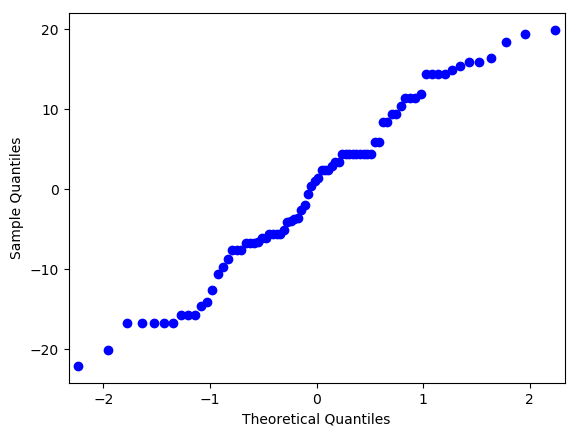

In [25]:
import statsmodels.graphics.api as smg 
fig,ax=plt.subplots()
length_pred2=regressor_2.predict(feature_2.transform(bluegills.age[:,np.newaxis]))
resid=length_pred2-bluegills.length
smg.qqplot(resid,ax=ax)
